In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
%matplotlib inline

In [2]:
auto = pd.read_csv('Automobile.csv')

In [3]:
auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Plotting univariate distributions
The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE)

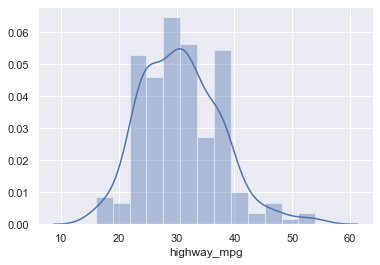

In [9]:
sns.distplot(auto['highway_mpg'])

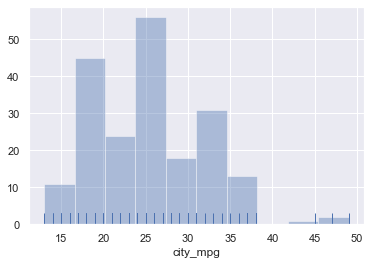

In [6]:
# Kernel Density Estimate off
# Display tick marks for each data point along the x-axis
sns.distplot(auto['city_mpg'], kde=False, rug=True)

# Plotting bivariate distributions
It can also be useful to visualize a relationship between two variables. The easiest way to do this in seaborn is to use the jointplot() function, which creates a scatterplot of the two variables along with the histograms of each next to the appropriate axes.

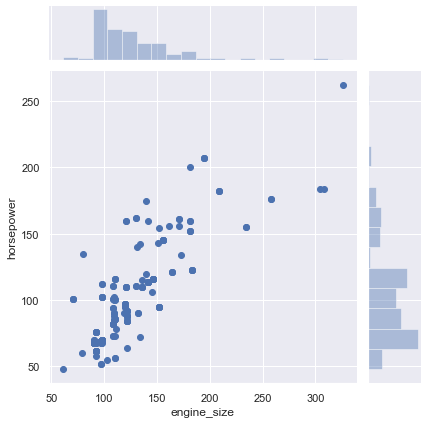

In [11]:
sns.jointplot(auto['engine_size'], auto['horsepower']);

## Hex Bin Plots
We can make a hex bin plot that breaks the 2D area into hexagons and the number of points in each hexagon determines the color

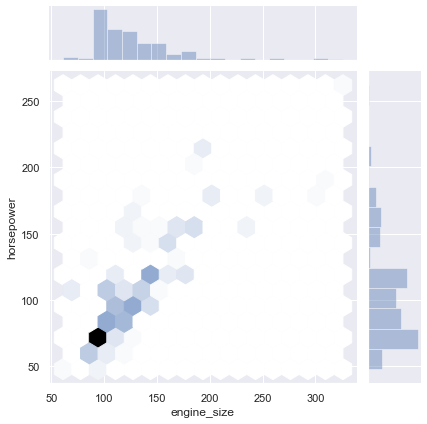

In [12]:
sns.jointplot(auto['engine_size'], auto['horsepower'], kind="hex");

## Kernel Density Estimation
We can make a 2D estimation of the density also

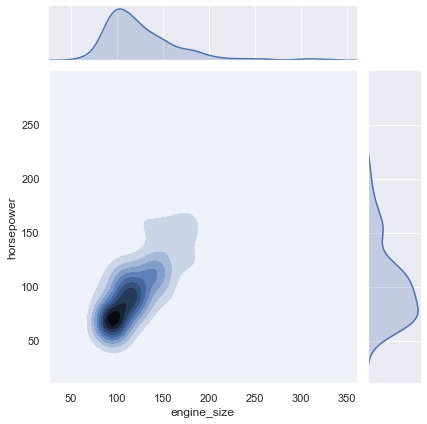

In [13]:
sns.jointplot(auto['engine_size'], auto['horsepower'], kind="kde");

## Visualizing pairwise relationships in a dataset
To plot multiple pairwise scatterplots in a dataset, you can use the pairplot() function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. It also draws the histogram of each variable on the diagonal axes.

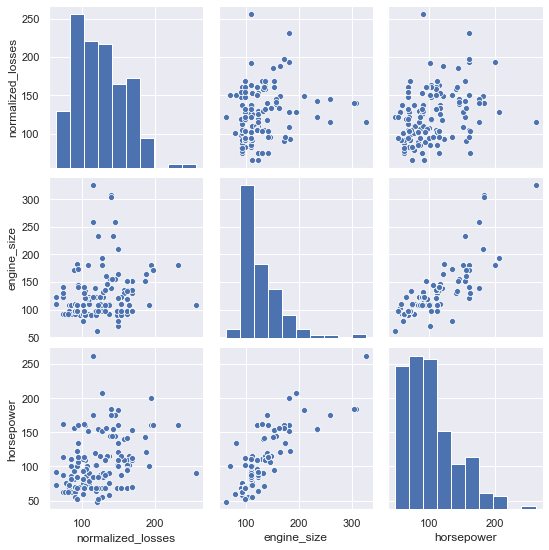

In [15]:
sns.pairplot(auto[['normalized_losses', 'engine_size', 'horsepower']]);